## Hierarchical Clustering with sci-kit learn

In [2]:
## Importing the essential packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Importing the dendrogram requirements from sci-kit learn

import scipy.cluster.hierarchy as sch

In [11]:
df = pd.read_csv("breast-cancer-wisconsin.data", sep="\t", header=None)


df.columns = ['Sample code number','Clump Thickness','Uniformity of Cell Size','Uniformity of Cell Shape',
              'Marginal Adhesion','Single Epithelial Cell Size','Bare Nuclei',
              'Bland Chromatin','Normal Nucleoli','Mitoses','Class']

In [4]:
df.head(2)

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2


In [12]:
df.shape

(699, 11)

In [13]:
for i in df.columns:
    print(df[i].value_counts())

1182404    6
1276091    5
1198641    3
466906     2
1116116    2
          ..
1207986    1
1302428    1
857774     1
1181356    1
625201     1
Name: Sample code number, Length: 645, dtype: int64
1     145
5     130
3     108
4      80
10     69
2      50
8      46
6      34
7      23
9      14
Name: Clump Thickness, dtype: int64
1     384
10     67
3      52
2      45
4      40
5      30
8      29
6      27
7      19
9       6
Name: Uniformity of Cell Size, dtype: int64
1     353
2      59
10     58
3      56
4      44
5      34
7      30
6      30
8      28
9       7
Name: Uniformity of Cell Shape, dtype: int64
1     407
3      58
2      58
10     55
4      33
8      25
5      23
6      22
7      13
9       5
Name: Marginal Adhesion, dtype: int64
2     386
3      72
4      48
1      47
6      41
5      39
10     31
8      21
7      12
9       2
Name: Single Epithelial Cell Size, dtype: int64
1     400
10    131
5      30
2      30
3      28
8      21
?      19
4      19
9       9
7   

In [14]:
## Taking the subset of data without "?" character 
df = df[df["Bare Nuclei"] != "?"]

In [15]:
df.shape

(680, 11)

In [16]:
df['Class'] = df['Class'].replace(2,0)
df['Class'] = df['Class'].replace(4,1)

In [17]:
df["Class"].value_counts()

0    442
1    238
Name: Class, dtype: int64

In [18]:
df.isnull().sum().sum()

0

In [20]:
#iloc[rows, columns]

df.iloc[:,[1,2,3,4,5,6,7,8,9]].values

array([[5, 1, 1, ..., 3, 1, 1],
       [5, 4, 4, ..., 3, 2, 1],
       [3, 1, 1, ..., 3, 1, 1],
       ...,
       [5, 10, 10, ..., 8, 10, 2],
       [4, 8, 6, ..., 10, 6, 1],
       [4, 8, 8, ..., 10, 4, 1]], dtype=object)

In [44]:
X = df.iloc[:,[1,2,3,4,5,6,7,8,9]].values

In [45]:
X

array([[5, 1, 1, ..., 3, 1, 1],
       [5, 4, 4, ..., 3, 2, 1],
       [3, 1, 1, ..., 3, 1, 1],
       ...,
       [5, 10, 10, ..., 8, 10, 2],
       [4, 8, 6, ..., 10, 6, 1],
       [4, 8, 8, ..., 10, 4, 1]], dtype=object)

## References for clustering and linkage

- https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.dendrogram.html


- https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html

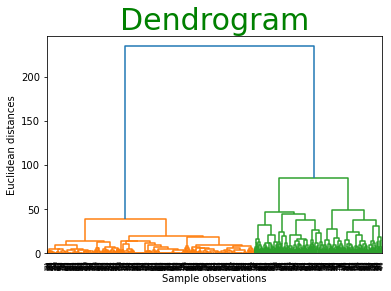

In [80]:
## Plotting the dendrogram

dendrogram = sch.dendrogram(sch.linkage(X, method = "ward"))  ## Approach to measure distance, centroid
plt.title("Dendrogram", fontsize=30, 
          color="green" )

plt.xlabel("Sample observations")
plt.ylabel("Euclidean distances")
plt.show()


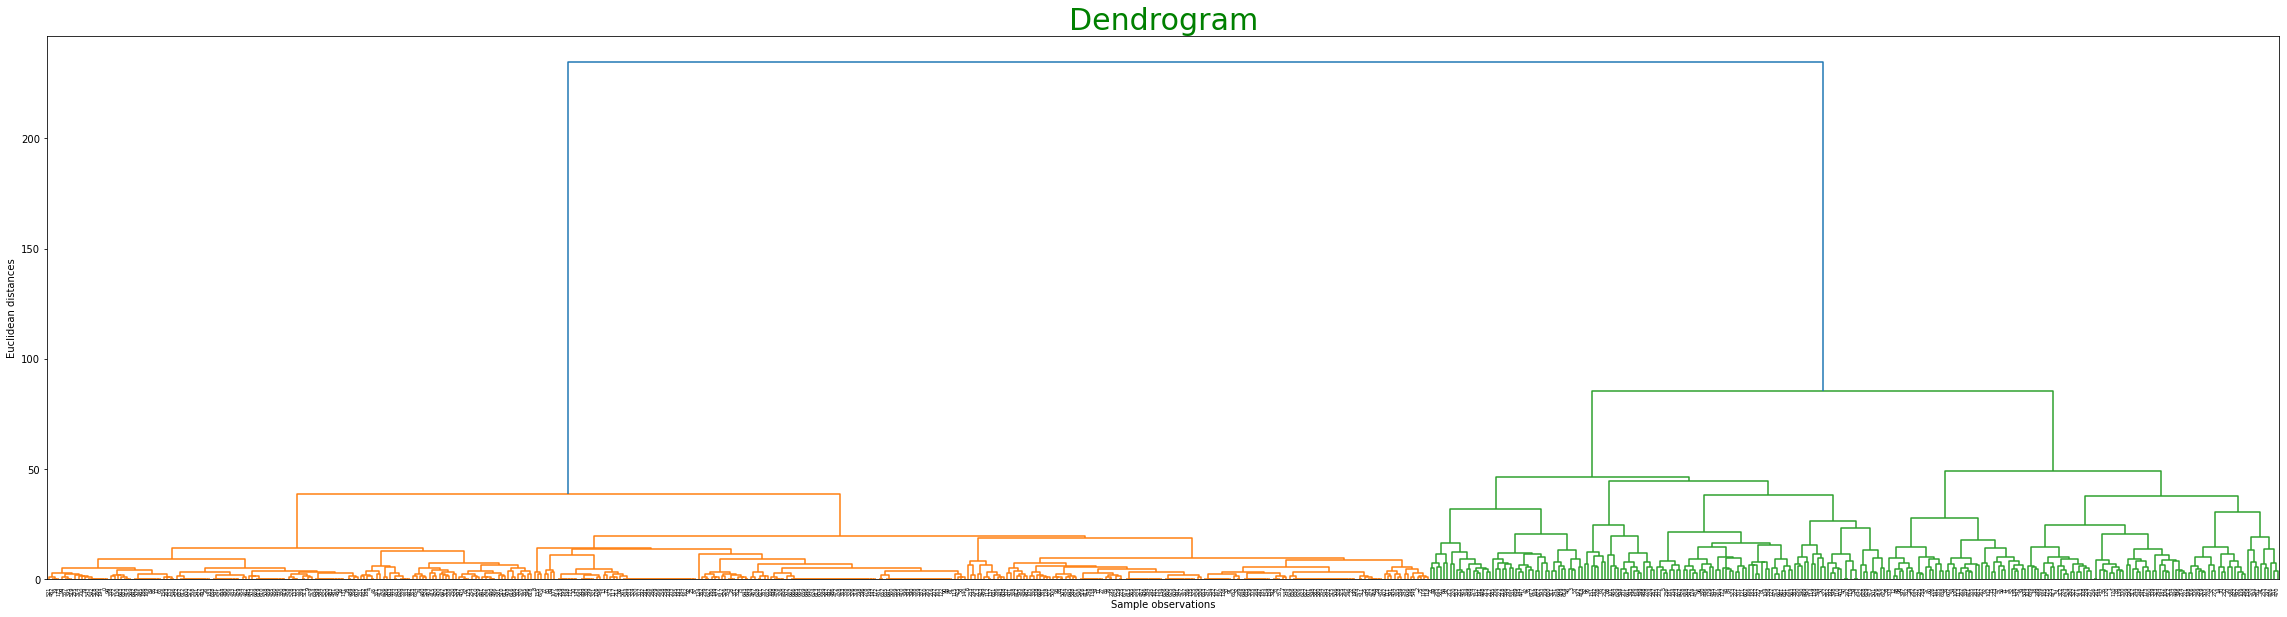

In [66]:
## Changing the size of the figure

plt.figure(figsize=(40,10))

dendrogram = sch.dendrogram(sch.linkage(X, method = "ward"))  ## Approach to measure distance, centroid
plt.title("Dendrogram", fontsize=30, 
          color="green" )

plt.xlabel("Sample observations")
plt.ylabel("Euclidean distances")
plt.show()

### Using the longest vertical line, split into half and find out the no. of horizontal lines its intersecting.
### This will give us the optimum no. of clusters


# Model Building


In [69]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 2, affinity = "euclidean", linkage ="ward")
y_hc = hc.fit_predict(X)

In [74]:
## Assigning the predictions into a new column of the dataframe for easier visualization

df["prediction"] = y_hc

In [79]:
df

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class,prediction
0,1000025,5,1,1,1,2,1,3,1,1,0,1
1,1002945,5,4,4,5,7,10,3,2,1,0,0
2,1015425,3,1,1,1,2,2,3,1,1,0,1
3,1016277,6,8,8,1,3,4,3,7,1,0,0
4,1017023,4,1,1,3,2,1,3,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2,1,1,1,0,1
695,841769,2,1,1,1,2,1,1,1,1,0,1
696,888820,5,10,10,3,7,3,8,10,2,1,0
697,897471,4,8,6,4,3,4,10,6,1,1,0


## Checking the model

In [73]:
pd.crosstab(df["Class"],df["prediction"])

prediction,0,1
Class,,
0,22,420
1,237,1
